<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_clustering_Combined_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [429]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [430]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Research/ASD//Autism-Child-Data.csv",na_values=['?'])
adu = pd.read_csv("/content/drive/MyDrive/Research/ASD//Autism-Adult-Data.csv",na_values=['?'])

In [431]:
#Adults
adu.sample(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
447,448,1,0,0,0,0,0,0,1,0,...,m,White-European,no,no,Netherlands,no,2,18 and more,Health care professional,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
321,322,0,1,1,0,0,0,0,1,0,...,f,Middle Eastern,no,no,United Arab Emirates,no,4,18 and more,Self,NO
325,326,1,1,1,0,1,0,0,1,0,...,m,Middle Eastern,no,no,United Arab Emirates,no,5,18 and more,Relative,NO
132,133,1,1,0,0,0,0,0,1,0,...,m,South Asian,no,no,India,no,3,18 and more,Self,NO


In [432]:
# Number of tuples and fields
print("Adults      :",adu.shape)

Adults      : (704, 22)


In [433]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [434]:
#Adults
adu.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [435]:
#Total number of missing values in each dataset
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Adults's dataset     :  192


In [436]:
#Adults
adu.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

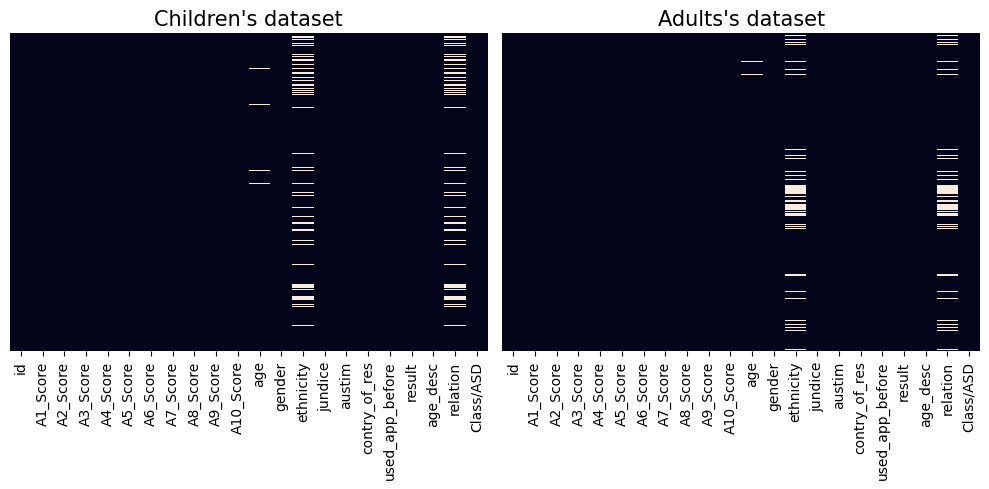

In [437]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[0])
ax[0].set_title("Children's dataset",fontsize = 15)

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[1])
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap.pdf', transparent=True, dpi=300)

In [438]:
#ASD or Not
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))

print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151

No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


In [439]:
# #Data distribution
# fig, ax = plt.subplots(figsize=(5, 5))
# sns.countplot(adu['Class/ASD'],ax=ax)
# ax.set_title("Adults's dataset",fontsize = 15)
# fig.tight_layout()
# plt.savefig('distribution_adu.pdf', transparent=True, dpi=300)

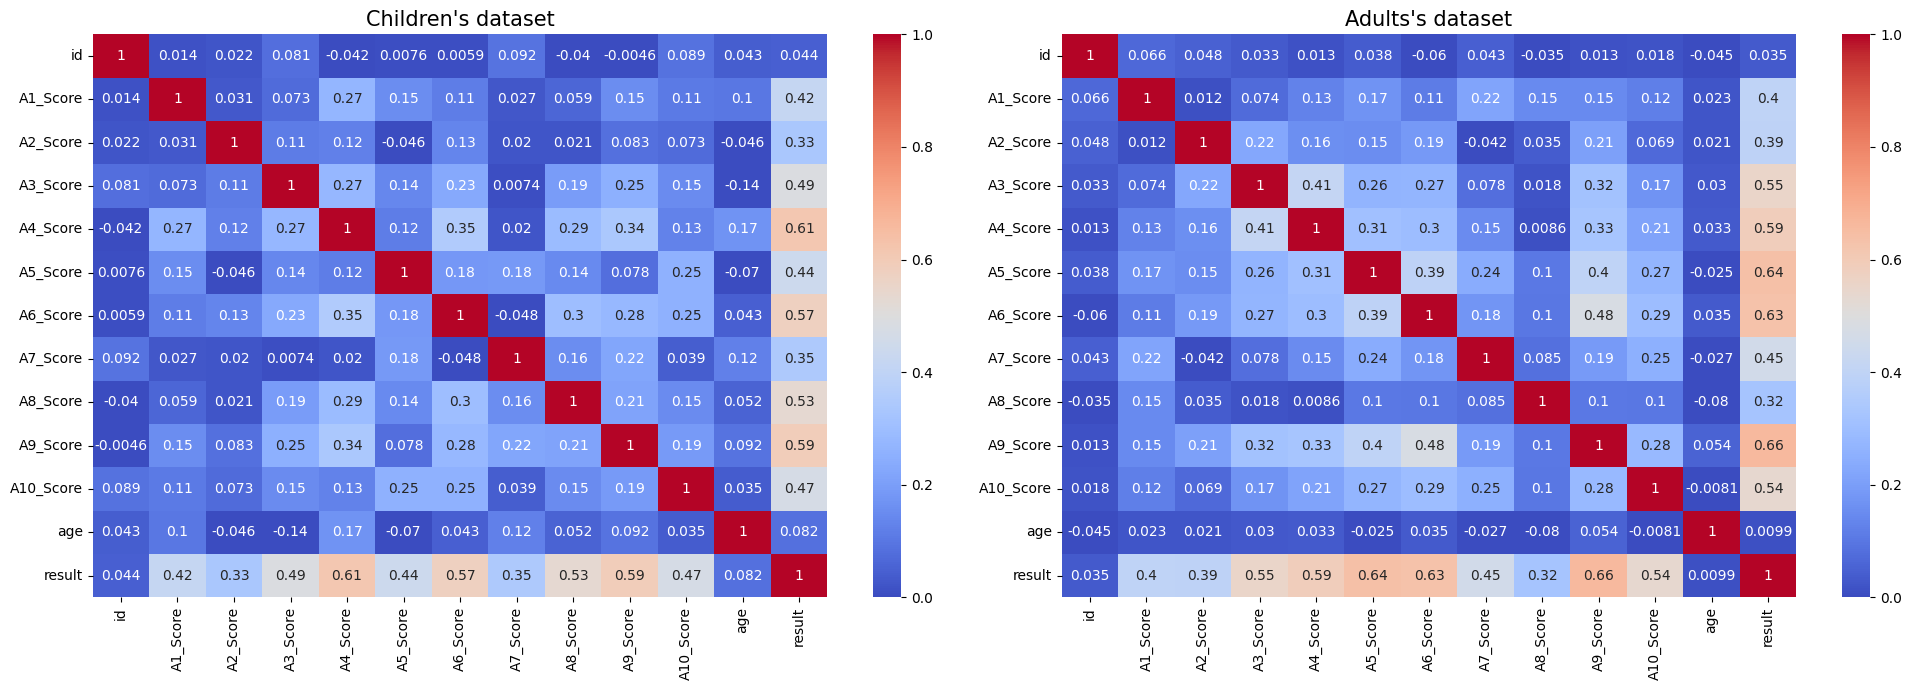

In [440]:
#Correlation
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.heatmap(ch.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[0])
sns.heatmap(adu.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[1])
ax[0].set_title("Children's dataset",fontsize = 15)
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation.pdf', transparent=True, dpi=300)

In [441]:
#Number of missing values in each dataset
print("No of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

No of missing values in Children's dataset    =  90
No of missing values in Adults's dataset      =  192


In [442]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]


#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='mean')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [443]:
print("After imputing,\nNo of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Children's dataset    =  0
After imputing,
No of missing values in Adults's dataset      =  0


In [444]:
#Since age of toddlers are represented in months, age(in years) of children, adolescents and adults is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12
adu['Age_Mons'] = adu['Age_Mons']*12

In [445]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

ch["relation"] = ch["relation"].replace('self','Self')

### **Model fitting**

In [446]:
#Adding a new field that represents the age group
ch['Age_group'] = 'Children'
adu['Age_group'] = 'Adults'

In [447]:
#Combining the dataset of children and adults to a single dataset
frames = [ch,adu]
final = pd.concat(frames)

In [448]:
#imputing missing values
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

final.contry_of_res = imputer_mode.fit_transform(final.contry_of_res.values.reshape(-1,1))[:,0]
final.used_app_before = imputer_mode.fit_transform(final.used_app_before.values.reshape(-1,1))[:,0]

In [449]:
final.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Age_group
0,1,1,1,0,0,1,1,0,1,0,...,Others,no,no,Jordan,no,5,4-11 years,Parent,NO,Children
1,2,1,1,0,0,1,1,0,1,0,...,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO,Children
2,3,1,1,0,0,0,1,1,1,0,...,White-European,no,no,Jordan,yes,5,4-11 years,Parent,NO,Children
3,4,0,1,0,0,1,1,0,0,0,...,White-European,yes,no,Jordan,no,4,4-11 years,Parent,NO,Children
4,5,1,1,1,1,1,1,1,1,1,...,Others,yes,no,United States,no,10,4-11 years,Parent,YES,Children


In [450]:
final.shape

(996, 23)

In [451]:
print("\nNo of individuals diagonised with ASD = ",len(final[final['Class/ASD'] == 'YES']))
print("No of individuals not diagonised with ASD = ",len(final[final['Class/ASD'] == 'NO']))


No of individuals diagonised with ASD =  330
No of individuals not diagonised with ASD =  666


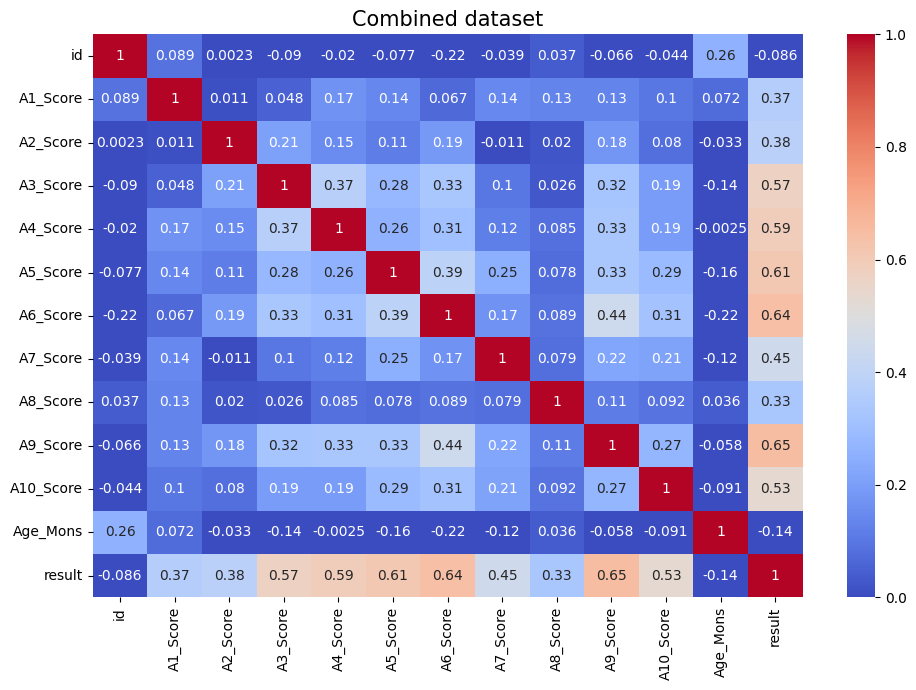

In [452]:
#Correlation
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(final.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax)
ax.set_title("Combined dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation_final.pdf', transparent=True, dpi=300)

*Spliting dependent and independent features*


In [453]:
shuffled_data = final.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=666)
final= pd.concat([ASD_data, non_ASD_data])

In [454]:
# Split the data into features and target label
raw_target= final['Class/ASD']
raw_features = final[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [455]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [456]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
121,1,0,1,1,1,1,1,1,1,1,0.034301,f,White-European,no,no,United States,0.9,Self
309,1,1,1,1,1,1,0,1,0,0,0.142480,f,Middle Eastern,no,no,United Kingdom,0.7,Self
301,1,1,1,1,1,1,1,1,1,1,0.076517,f,White-European,yes,no,United Kingdom,1.0,Self
524,1,1,1,1,0,1,0,1,1,1,0.087071,m,White-European,no,no,United Kingdom,0.8,Self
197,1,0,1,1,1,1,1,1,1,1,0.089710,m,White-European,no,no,Germany,0.9,Self


##Encoding Categorical variables

In [457]:
features = pd.get_dummies(features_minmax_transform)
print('features.shape:', features.shape)

features.shape: (996, 117)


In [458]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [459]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss

def model_report(y_act, y_pred):
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")


In [460]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [461]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
# print('X:', X)

X.shape: (996, 117)
y.shape: (996,)


## Feature Selection

In [462]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
chi2_features = SelectKBest(chi2,k=75)
fit= chi2_features.fit(X, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(50,'Score')) 

                               Features       Score
8                              A9_Score  223.587733
5                              A6_Score  186.444131
3                              A4_Score  121.202318
4                              A5_Score  112.167723
2                              A3_Score   94.831550
11                               result   82.375528
9                             A10_Score   65.995649
6                              A7_Score   64.352114
1                              A2_Score   44.744991
107  contry_of_res_United Arab Emirates   35.582565
109         contry_of_res_United States   31.032798
0                              A1_Score   27.850997
7                              A8_Score   27.482103
18            ethnicity_Middle Eastern    20.818204
114                     relation_Parent   20.436989
72                 contry_of_res_Jordan   15.562309
23             ethnicity_White-European   12.413462
47                 contry_of_res_Canada   12.198645
64          

In [463]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=75)
X = chi2_features.fit_transform(X, y)
y = target

In [464]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Clustering

In [465]:
# TSNE Plot
from sklearn.manifold import TSNE

def plotTSNE(data, label):
  # Perform t-SNE with 2 components
  tsne = TSNE(n_components=2)
  data_tsne = tsne.fit_transform(data)

  # Plot the t-SNE results with true labels
  plt.scatter(data_tsne[label==0, 0], data_tsne[label==0, 1], label='Label 0')
  plt.scatter(data_tsne[label==1, 0], data_tsne[label==1, 1], label='Label 1')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.legend()
  plt.show()


In [466]:
# calculate clustering metrices
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score

def calculate_scores(data, label_true, label_pred, algo):
  # Calculate SC, NMI & ARI
  sc_euclidean = silhouette_score(data, label_pred, metric='euclidean')
  nmi = normalized_mutual_info_score(label_true, label_pred),
  ari = adjusted_rand_score(label_true, label_pred)

  print(algo, ':: NMI:', nmi, ' ARI:', ari, ' SC:', sc_euclidean)


In [467]:
# Perform K-Means clustering with 2 clusters
# Define the parameter grid
param_dist = {'n_clusters': [2],
              'init': ['k-means++', 'random'],
              'n_init': [10, 20, 50],
              'max_iter': [300, 500, 1000],
              'algorithm': ['lloyd', 'auto', 'full', 'elkan']}

# Create a KMeans instance
kmeans = KMeans()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(kmeans, param_distributions=param_dist, cv=5, n_iter=100, n_jobs=-1, verbose=2, random_state=42, scoring=silhouette_score)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train)

# Extract the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print('best_params:', best_params)
print('best_score:', best_score)

# Create a new KMeans instance with the best parameters
best_kmeans = KMeans(n_clusters=best_params['n_clusters'], init=best_params['init'], n_init=best_params['n_init'], max_iter=best_params['max_iter'], algorithm=best_params['algorithm'])

# Fit the best KMeans model to the data
best_kmeans.fit(X_train)

# Predict the cluster labels for the data
labels = best_kmeans.predict(X_test)

calculate_scores(X_test, y_test, labels, 'Kmeans')
# model_report(y_test, labels)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best_params: {'n_init': 10, 'n_clusters': 2, 'max_iter': 300, 'init': 'k-means++', 'algorithm': 'lloyd'}
best_score: nan
Kmeans :: NMI: (0.47905141914715876,)  ARI: 0.5160380712300433  SC: 0.11960526778329982


In [468]:
# Perform Agglomerative clustering with 2 clusters
# Define the parameter grid
param_grid = {'n_clusters': [2],
              'linkage': ['ward', 'complete', 'average'],
              'affinity': ['euclidean', 'l1', 'l2', 'manhattan']}

# Create a KMeans instance
agglo = AgglomerativeClustering()

# Create a GridSearchCV object
random_search = RandomizedSearchCV(agglo, param_distributions=param_grid, n_iter=100, cv=5, verbose=2,
                               random_state=43,n_jobs=-1, scoring=silhouette_score)

# Fit the grid search to the data
random_search.fit(X_train)

# Extract the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print('best_params:', best_params)
print('best_score:', best_score)

# Create a new KMeans instance with the best parameters
best_agglo = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'], affinity=best_params['affinity'])

# Fit the best KMeans model to the data
best_agglo.fit(X_train)

# Predict the cluster labels for the data
labels = best_agglo.fit_predict(X_test)

calculate_scores(X_test, y_test, labels, 'Agglo')
# model_report(y_test, labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best_params: {'n_clusters': 2, 'linkage': 'ward', 'affinity': 'euclidean'}
best_score: nan
Agglo :: NMI: (0.2267693198381233,)  ARI: 0.27729263706733154  SC: 0.10281070158805011


In [469]:
# Perform Gaussian Mixture Model clustering with 2 components
# Define the parameter grid
param_grid = {'n_components': [2],
              'covariance_type': ['full', 'tied', 'diag', 'spherical']}

# Create a KMeans instance
gmm = GaussianMixture()

# Create a GridSearchCV object
random_search = RandomizedSearchCV(gmm, param_distributions=param_grid, n_iter=100, cv=5, verbose=2,
                               random_state=42,n_jobs=-1, scoring=silhouette_score)

# Fit the grid search to the data
random_search.fit(X_train)

# Extract the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print('best_params:', best_params)
print('best_score:', best_score)

# Create a new KMeans instance with the best parameters
best_model = GaussianMixture(n_components=best_params['n_components'], covariance_type=best_params['covariance_type'])

# Fit the best KMeans model to the data
best_model.fit(X_train)

# Predict the cluster labels for the data
labels = best_model.predict(X_test)

calculate_scores(X_test, y_test, labels, 'GMM')
# model_report(y_test, labels)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best_params: {'n_components': 2, 'covariance_type': 'full'}
best_score: nan
GMM :: NMI: (0.04340559915164593,)  ARI: 0.07205431074385833  SC: 0.036719565751080666


In [470]:
# Perform Spectral clustering with 2 components
# Define the parameter grid
param_grid = {'n_clusters': [2],
              'affinity': ['nearest_neighbors', 'rbf'],
              'gamma': [0.001, 0.01, .1, 1, 10, 100]}

# Create a KMeans instance
spectral = SpectralClustering()

# Create a GridSearchCV object
random_search = RandomizedSearchCV(spectral, param_distributions=param_grid, n_iter=100, cv=5, verbose=2,
                               random_state=42, n_jobs=-1, scoring=silhouette_score)

# Fit the grid search to the data
random_search.fit(X_train)

# Extract the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print('best_params:', best_params)
print('best_score:', best_score)

# Create a new KMeans instance with the best parameters
best_model = SpectralClustering(n_clusters=best_params['n_clusters'], affinity=best_params['affinity'], gamma=best_params['gamma'])

# Fit the best KMeans model to the data
best_model.fit(X_train)

# Predict the cluster labels for the data
labels = best_model.fit_predict(X_test)

calculate_scores(X_test, y_test, labels, 'Spectral')
# model_report(y_test, labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best_params: {'n_clusters': 2, 'gamma': 0.001, 'affinity': 'nearest_neighbors'}
best_score: nan
Spectral :: NMI: (0.5399609961087098,)  ARI: 0.6683333333333333  SC: 0.10987877594361223


In [471]:
# Perform Birch clustering with 2 components
# Define the parameter grid
param_grid = {'n_clusters': [2],
              'threshold': [.001, 0.01, .05, 0.1, 0.5, 1],
              'branching_factor': [20, 50, 100, 200]}

# Create a KMeans instance
birch = Birch()

# Create a GridSearchCV object
random_search = RandomizedSearchCV(birch, param_distributions=param_grid, n_iter=100, cv=5, verbose=2,
                               random_state=42, n_jobs=-1, scoring=silhouette_score)

# Fit the grid search to the data
random_search.fit(X_train)

# Extract the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print('best_params:', best_params)
print('best_score:', best_score)

# Create a new KMeans instance with the best parameters
best_model = Birch(n_clusters=best_params['n_clusters'], threshold=best_params['threshold'], branching_factor=best_params['branching_factor'])

# Fit the best KMeans model to the data
best_model.fit(X_train)

# Predict the cluster labels for the data
labels = best_model.fit_predict(X_test)

calculate_scores(X_test, y_test, labels, 'Birch')
# model_report(y_test, labels)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best_params: {'threshold': 0.001, 'n_clusters': 2, 'branching_factor': 20}
best_score: nan
Birch :: NMI: (0.3655209863321053,)  ARI: 0.4587411993030273  SC: 0.11506953721462793
